<a href="https://colab.research.google.com/github/mjmousavi97/Image-processing-TehranUni-2025/blob/master/DIP-HW10/src/q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
train_mask = (y_train == 0) | (y_train == 1)
test_mask = (y_test == 0) | (y_test == 1)

X_train = X_train[train_mask]
y_train = y_train[train_mask]

X_test = X_test[test_mask]
y_test = y_test[test_mask]

In [5]:
print(f'Shape of X train is: {X_train.shape}')
print(f'Shape of y train is: {y_train.shape}')
print(f'Shape of X test is: {X_test.shape}')
print(f'Shape of y test is: {y_train.shape}')

Shape of X train is: (12665, 28, 28)
Shape of y train is: (12665,)
Shape of X test is: (2115, 28, 28)
Shape of y test is: (12665,)


In [6]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# Reshape images to vectors (28x28 → 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
print(f'Shape of X train is: {X_train.shape}')
print(f'Shape of X test is: {X_test.shape}')

Shape of X train is: (12665, 784)
Shape of X test is: (2115, 784)


In [11]:
# Define a simple feedforward neural network with one hidden layer
model = Sequential(
    [
        Dense(128, activation='relu', input_shape=(784, )),
        Dense(1, activation='sigmoid')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

In [13]:
# Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9712 - loss: 0.1258 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 7.1845e-04
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 4.5792e-04
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.2285e-04
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 8.2567e-04 - val_accuracy: 1.0000 - val_loss: 2.1326e-04
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 6.4963e-04 - val_accuracy: 1.0000 - val_loss: 1.8036e-04
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 9.1222e-04 -

In [14]:
# Predict class probabilities for the test set
y_pred_probs = model.predict(X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Convert probabilities to binary class predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

In [16]:
# Calculate performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Display evaluation results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 0.9995271867612293
Precision: 0.9991197183098591
Recall: 1.0
Confusion Matrix:
 [[ 979    1]
 [   0 1135]]


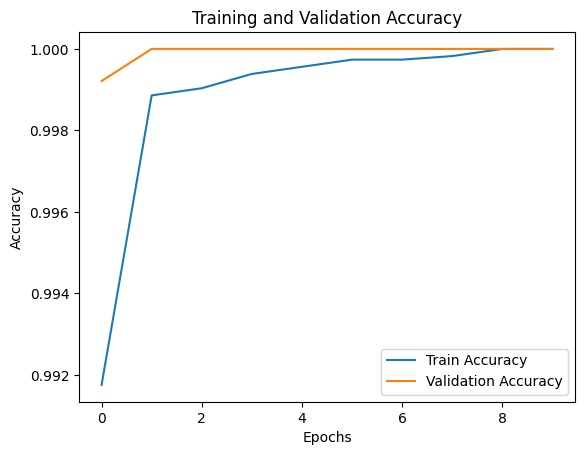

In [17]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()